In [73]:
%config IPCompleter.greedy = True
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd
import researchpy as rp

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from scipy import stats

In [74]:
# Read customer data set
customerData = pd.read_csv('customer_data.csv')
customerData

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [75]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [76]:
# Read internet data set
internetData = pd.read_csv('internet_data.csv')
internetData

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,Yes,Fiber optic,No,No,No,No,No,No


In [77]:
internetData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   MultipleLines     7043 non-null   object
 2   InternetService   7043 non-null   object
 3   OnlineSecurity    7043 non-null   object
 4   OnlineBackup      7043 non-null   object
 5   DeviceProtection  7043 non-null   object
 6   TechSupport       7043 non-null   object
 7   StreamingTV       7043 non-null   object
 8   StreamingMovies   7043 non-null   object
dtypes: object(9)
memory usage: 495.3+ KB


In [78]:
# Read churn data set
churnData = pd.read_csv('churn_data.csv')
churnData

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [79]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [80]:
# Merging Customer and Internet Data
mergedData = pd.merge(customerData, internetData ,on='customerID', how='left')
mergedData

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


In [81]:
# Megring All Data(Customer and Internet) and Churn Data
mergedData = pd.merge(mergedData, churnData,on='customerID', how='left')
mergedData

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,...,Yes,Yes,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,...,Yes,Yes,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,...,No,No,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Fiber optic,No,No,No,...,No,No,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [82]:
mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Answer 1 

## Here we can see that 'SeniorCitizen' , 'tenure' and 'MonthlyCharges' are coming as NUMERIC fields and all other fields are coming as STRING which does not have any null values.

## Also, 'TotalCharges' should come as Numeric but its coming as Object, therefore we should convert TotalCharges into numeric and check if it has any blank values.

In [83]:
mergedData['TotalCharges'] = pd.to_numeric(mergedData['TotalCharges'], errors='coerce')

In [84]:
mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [85]:
mergedData.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## We can clearly see that we have some 11 null values/Missing Values in the 'TotalCharges' column. We need to replace these values with either mean, median, mode.

In [86]:
mergedData.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

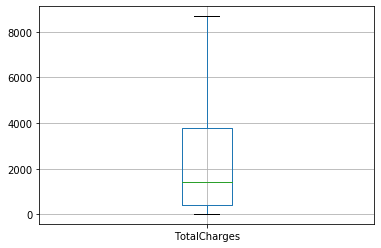

In [87]:
boxplot = mergedData.boxplot(column=['TotalCharges'])

## From the BoxPlot above it is visible that the column has outliers therefore replacing the null values with mean is not a good option.

In [88]:
blankTotalCharges = mergedData[mergedData['TotalCharges'].isnull()]
blankTotalCharges

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,No phone service,DSL,Yes,No,Yes,...,Yes,No,0,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,No,DSL,Yes,Yes,Yes,...,Yes,Yes,0,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,No phone service,DSL,Yes,Yes,Yes,...,Yes,No,0,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,Yes,DSL,No,Yes,Yes,...,Yes,No,0,Yes,Two year,No,Mailed check,73.35,NaN,No


In [89]:
mergedData.TotalCharges.mean()

2283.3004408418697

In [90]:
mergedData.TotalCharges.median()

1397.475

In [91]:
modeTotalCharges = mergedData.TotalCharges.mode()
modeTotalCharges = modeTotalCharges[0]
modeTotalCharges

20.2

## From the blankTotalCharges Dataframe above it is clearly visible that these are the customers with tenure = 0 and these will not be the ones with high TotalCharges. Therefore Mean and Median are not a good option here. 
# From mean, median and mode we can prefer 'mode' in this case as it is the lowest.

In [92]:
mergedData['TotalCharges'].fillna(modeTotalCharges, inplace=True)

In [93]:
mergedData.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Now we can see that there are no null values.

## Answer 2

In [94]:
# 2.1

In [95]:
averageTenureVsChrun = mergedData.groupby('Churn')['tenure'].mean()
round(averageTenureVsChrun)

Churn
No     38.0
Yes    18.0
Name: tenure, dtype: float64

## The average tenure of the customers with the telecom operator, those who are still with the company as a customer is : 38 months.

## The average tenure of the customers with the telecom operator those who have left using the services provided by the company is : 18 months


In [96]:
#2.2

In [97]:
averageRevenueVsChrun = mergedData.groupby('Churn')['MonthlyCharges'].mean()
averageRevenueVsChrun

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

## The monthly average revenue generated by the customers who are with the company is : 61.2

## The monthly average revenue generated by the customers who have left the company is : 74.4


In [98]:
# 2.3

In [99]:
onlyChurnNoCustomer = mergedData.loc[mergedData.Churn == 'No']
onlyChurnNoCustomer

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.50,No
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,Yes,Fiber optic,No,Yes,No,...,Yes,No,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,No phone service,DSL,Yes,No,No,...,No,No,10,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,6840-RESVB,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,...,Yes,Yes,24,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,...,Yes,Yes,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,...,No,No,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [100]:
monthlyAverageRevenueVsGender = onlyChurnNoCustomer.groupby('gender')['MonthlyCharges'].mean()
monthlyAverageRevenueVsGender

gender
Female    61.664908
Male      60.876914
Name: MonthlyCharges, dtype: float64

## From the data of customer who are still with the company we can see that :
## The monthly average revenue generated by Females customer is 61.6
## The monthly average revenue generated by Males customer is 60.8

In [101]:
#2.4

In [102]:
onlyChurnNoCustomer.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [103]:
churnNoInternetServiceYes = onlyChurnNoCustomer.loc[~(onlyChurnNoCustomer.InternetService == 'No')]
churnNoInternetServiceYes

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.50,No
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,Yes,Fiber optic,No,Yes,No,...,Yes,No,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,No phone service,DSL,Yes,No,No,...,No,No,10,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,7750-EYXWZ,Female,0,No,No,No phone service,DSL,No,Yes,Yes,...,Yes,Yes,12,No,One year,No,Electronic check,60.65,743.30,No
7038,6840-RESVB,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,...,Yes,Yes,24,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,...,Yes,Yes,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,...,No,No,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [104]:
print("Total Non Churn Customer = " + str(len(onlyChurnNoCustomer)))
print("Total Non Churn Customer using Internet as a Service  = " + str(len(churnNoInternetServiceYes)))
percentageChurnNoInternetYes = round(((len(churnNoInternetServiceYes))/(len(onlyChurnNoCustomer))*100),2)
print("Percentage of Non Churn Customer using Internet as a Service  = " + str(percentageChurnNoInternetYes))


Total Non Churn Customer = 5174
Total Non Churn Customer using Internet as a Service  = 3761
Percentage of Non Churn Customer using Internet as a Service  = 72.69


## Total Non Churn Customer = 5174
## Total Non Churn Customer using Internet as a Service  = 3761
## Percentage of Non Churn Customer using Internet as a Service  = 72.7 %

In [105]:
# 2.5.1

In [106]:
onlyChurnNoCustomer['OnlineSecurity'].value_counts()


No                     2037
Yes                    1724
No internet service    1413
Name: OnlineSecurity, dtype: int64

In [107]:
pctChurnNoVsOnlineSecurity = round(onlyChurnNoCustomer['OnlineSecurity'].value_counts(normalize = True)*100)
pctChurnNoVsOnlineSecurity

No                     39.0
Yes                    33.0
No internet service    27.0
Name: OnlineSecurity, dtype: float64

Text(0.5, 0, 'Onine Security Service Preference')

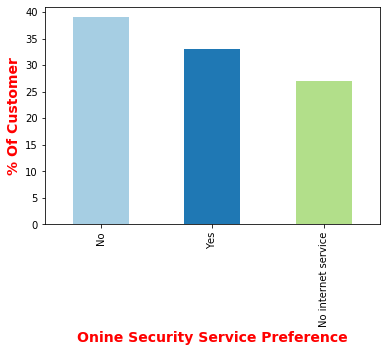

In [108]:

pctChurnNoVsOnlineSecurity.plot(kind='bar',color=plt.cm.Paired(np.arange(len(pctChurnNoVsOnlineSecurity))))
plt.ylabel('% Of Customer', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')
plt.xlabel('Onine Security Service Preference', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')

## From Non-Churning Customers

## Only 33% customers prefer/use Online Security service.

## From the above analysis we can observe that 39% customers do not prefer 'Online Security' service and 27% customers do not have internet service acitivated therefore they also do not prefer/use Online Security service.

## In totality 66% customers do not prefer/use Online Security service.

In [109]:
#2.5.2

In [110]:
onlyChurnNoCustomer['OnlineBackup'].value_counts()

Yes                    1906
No                     1855
No internet service    1413
Name: OnlineBackup, dtype: int64

In [111]:
pctChurnNoVsOnlineBackup = round(onlyChurnNoCustomer['OnlineBackup'].value_counts(normalize = True)*100)
pctChurnNoVsOnlineBackup


Yes                    37.0
No                     36.0
No internet service    27.0
Name: OnlineBackup, dtype: float64

Text(0.5, 0, 'Onine Backup Service Preference')

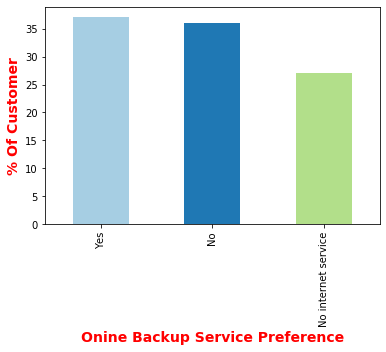

In [112]:
pctChurnNoVsOnlineBackup.plot(kind='bar',color=plt.cm.Paired(np.arange(len(pctChurnNoVsOnlineBackup))))
plt.ylabel('% Of Customer', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')
plt.xlabel('Onine Backup Service Preference', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')


## From Non-Churning Customers

## Only 37.0% customers prefer/use Online Backup service.

## From the above analysis we can observe that 36% customers do not prefer 'Online Backup' service and 27% customers do not have internet service acitivated therefore they also do not prefer/use Online Backup service.

## In totality 63% customers do not prefer/use Online Backup service.

In [113]:
#2.5.3

In [114]:
onlyChurnNoCustomer['DeviceProtection'].value_counts()

No                     1884
Yes                    1877
No internet service    1413
Name: DeviceProtection, dtype: int64

In [115]:
pctChurnNoVsOnlineDeviceProtection = round(onlyChurnNoCustomer['DeviceProtection'].value_counts(normalize = True)*100)
pctChurnNoVsOnlineDeviceProtection


No                     36.0
Yes                    36.0
No internet service    27.0
Name: DeviceProtection, dtype: float64

Text(0.5, 0, 'Device Protection Service Preference')

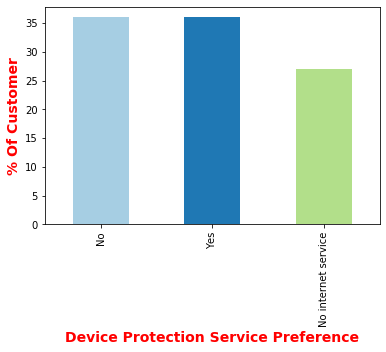

In [116]:
pctChurnNoVsOnlineDeviceProtection.plot(kind='bar',color=plt.cm.Paired(np.arange(len(pctChurnNoVsOnlineDeviceProtection))))
plt.ylabel('% Of Customer', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')
plt.xlabel('Device Protection Service Preference', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')


## From Non-Churning Customers

## Only 36.0% customers prefer/use Device Protection service.

## From the above analysis we can observe that 36% customers do not prefer 'Device Protection' service and 27% customers do not have internet service acitivated therefore they also do not prefer/use Device Protection service.

## In totality 63% customers do not prefer/use Device Protection service.

In [117]:
#2.5.4

In [118]:
onlyChurnNoCustomer['TechSupport'].value_counts()

No                     2027
Yes                    1734
No internet service    1413
Name: TechSupport, dtype: int64

In [119]:
pctChurnNoVsOnlineTechSupport = round(onlyChurnNoCustomer['TechSupport'].value_counts(normalize = True)*100)
pctChurnNoVsOnlineTechSupport


No                     39.0
Yes                    34.0
No internet service    27.0
Name: TechSupport, dtype: float64

Text(0.5, 0, 'Tech Support Service Preference')

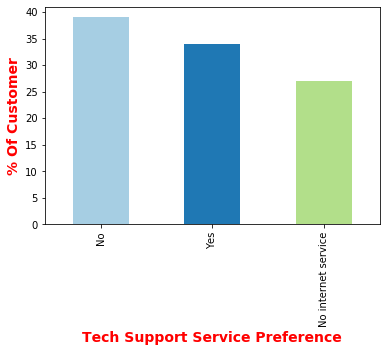

In [120]:
pctChurnNoVsOnlineTechSupport.plot(kind='bar',color=plt.cm.Paired(np.arange(len(pctChurnNoVsOnlineTechSupport))))
plt.ylabel('% Of Customer', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')
plt.xlabel('Tech Support Service Preference', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')


## From Non-Churning Customers

## Only 34.0% customers prefer/use Tech support service.

## From the above analysis we can observe that 39% customers do not prefer 'Tech support' service and 27% customers do not have internet service acitivated therefore they also do not prefer/use Tech support service.

## In totality 66% customers do not prefer/use Tech support service.

In [121]:
# 2.5.5

In [122]:
onlyChurnNoCustomer['StreamingTV'].value_counts()


Yes                    1893
No                     1868
No internet service    1413
Name: StreamingTV, dtype: int64

In [123]:
pctChurnNoVsOnlineStreamingTV = round(onlyChurnNoCustomer['StreamingTV'].value_counts(normalize = True)*100)
pctChurnNoVsOnlineStreamingTV


Yes                    37.0
No                     36.0
No internet service    27.0
Name: StreamingTV, dtype: float64

Text(0.5, 0, 'StreamingTV Service Preference')

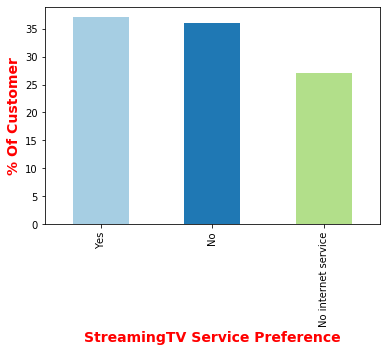

In [124]:
pctChurnNoVsOnlineStreamingTV.plot(kind='bar',color=plt.cm.Paired(np.arange(len(pctChurnNoVsOnlineStreamingTV))))
plt.ylabel('% Of Customer', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')
plt.xlabel('StreamingTV Service Preference', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')


## From Non-Churning Customers

## Only 37.0% customers prefer/use Streaming TV service.

## From the above analysis we can observe that 36% customers do not prefer 'Streaming TV' service and 27% customers do not have internet service acitivated therefore they also do not prefer/use Streaming TV service.

## In totality 63% customers do not prefer/use Streaming TV service.

In [125]:
#2.5.6

In [126]:
onlyChurnNoCustomer['StreamingMovies'].value_counts()


Yes                    1914
No                     1847
No internet service    1413
Name: StreamingMovies, dtype: int64

In [127]:
pctChurnNoVsOnlineStreamingMovies = round(onlyChurnNoCustomer['StreamingMovies'].value_counts(normalize = True)*100)
pctChurnNoVsOnlineStreamingMovies

Yes                    37.0
No                     36.0
No internet service    27.0
Name: StreamingMovies, dtype: float64

Text(0.5, 0, 'StreamingMovies Service Preference')

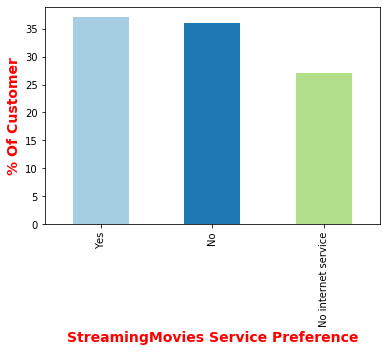

In [128]:
pctChurnNoVsOnlineStreamingMovies.plot(kind='bar',color=plt.cm.Paired(np.arange(len(pctChurnNoVsOnlineStreamingMovies))))
plt.ylabel('% Of Customer', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')
plt.xlabel('StreamingMovies Service Preference', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')


## From Non-Churning Customers

## Only 37.0% customers prefer/use Streaming Movies service.

## From the above analysis we can observe that 36% customers do not prefer 'Streaming Movies' service and 27% customers do not have internet service acitivated therefore they also do not prefer/use Streaming Movies service.

## In totality 63% customers do not prefer/use Streaming Movies service.

In [129]:
#2.6

In [130]:
onlyChurnNoCustomer['PaymentMethod'].value_counts()



Mailed check                 1304
Electronic check             1294
Credit card (automatic)      1290
Bank transfer (automatic)    1286
Name: PaymentMethod, dtype: int64

In [131]:
pctChurnNoVsPaymentMethod = round(onlyChurnNoCustomer['PaymentMethod'].value_counts(normalize = True)*100,2)
pctChurnNoVsPaymentMethod


Mailed check                 25.20
Electronic check             25.01
Credit card (automatic)      24.93
Bank transfer (automatic)    24.86
Name: PaymentMethod, dtype: float64

Text(0.5, 0, 'PaymentMethod Prefered')

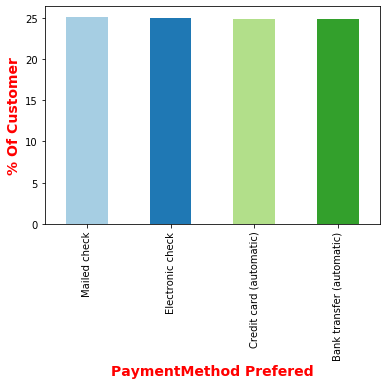

In [132]:
pctChurnNoVsPaymentMethod.plot(kind='bar',color=plt.cm.Paired(np.arange(len(pctChurnNoVsPaymentMethod))))
plt.ylabel('% Of Customer', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')
plt.xlabel('PaymentMethod Prefered', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')


## From Non-Churning Customers

## We can see that the customers are approximately equally distributed in the preferred payment method option.

## From the above analysis we can observe that:

### Mailed check is used by 25.2% Customers
### Electronic check is used by 25.0% Customers
### Credit card (automatic) is used by 24.9% Customers
### Bank transfer (automatic) is used by 24.8% Customers

## Customers prefer Credit Card and Bank Transfer Payment which comes to a total of 49%


In [133]:
# 2.7

In [134]:
avgMonthlyVsPartner = onlyChurnNoCustomer.groupby('Partner')['MonthlyCharges'].mean()
avgMonthlyVsPartner

Partner
No     57.271856
Yes    64.831742
Name: MonthlyCharges, dtype: float64

## Customers(non-churn) with a partner generate more profit for the company? - Yes , we can clearly see form above that the customers with partner generate Average Monthly Charges which is 64.8 which is more than the ones which are not using partner(57.2).

In [135]:
#2.8

In [136]:
internetServiceVsChurnNo = onlyChurnNoCustomer['InternetService'].value_counts()
internetServiceVsChurnNo

DSL            1962
Fiber optic    1799
No             1413
Name: InternetService, dtype: int64

In [137]:
pctInternetServiceVsChurnNo = round(onlyChurnNoCustomer['InternetService'].value_counts(normalize = True)*100)
pctInternetServiceVsChurnNo


DSL            38.0
Fiber optic    35.0
No             27.0
Name: InternetService, dtype: float64

Text(0.5, 0, 'Internet Service Prefered')

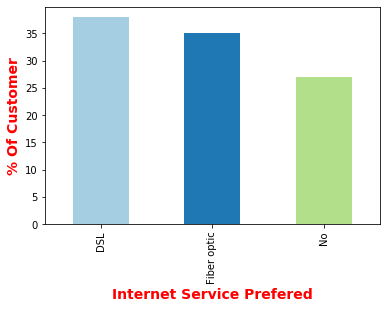

In [138]:
pctInternetServiceVsChurnNo.plot(kind='bar',color=plt.cm.Paired(np.arange(len(pctInternetServiceVsChurnNo))))
plt.ylabel('% Of Customer', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')
plt.xlabel('Internet Service Prefered', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')


# DSL type of internet service is more popular among the non-churn customers. In the above plot and percentage we can see around 38% non churn customer use DSL

In [139]:
#2.9

In [140]:
nonChurnTotalRevenueSorted = onlyChurnNoCustomer.sort_values(['TotalCharges'], ascending=[False])
nonChurnTotalRevenueSorted

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4586,7569-NMZYQ,Female,0,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,...,Yes,Yes,72,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
6768,9739-JLPQJ,Female,0,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,...,Yes,Yes,72,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
5347,9788-HNGUT,Male,0,Yes,No,Yes,Fiber optic,Yes,Yes,Yes,...,Yes,Yes,72,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No
2187,8879-XUAHX,Male,0,Yes,No,Yes,Fiber optic,Yes,Yes,Yes,...,Yes,Yes,71,Yes,Two year,Yes,Electronic check,116.25,8564.75,No
6118,9924-JPRMC,Male,0,No,No,Yes,Fiber optic,Yes,Yes,Yes,...,Yes,Yes,72,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,1015-OWJKI,Male,0,No,No,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,1,Yes,Month-to-month,No,Mailed check,19.05,19.05,No
583,1423-BMPBQ,Female,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,1,Yes,Month-to-month,Yes,Mailed check,19.00,19.00,No
4939,9975-SKRNR,Male,0,No,No,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,1,Yes,Month-to-month,No,Mailed check,18.90,18.90,No
1151,8992-CEUEN,Female,0,No,No,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,1,Yes,Month-to-month,No,Electronic check,18.85,18.85,No


In [141]:
churnNoTop10CustAvgRevenue = nonChurnTotalRevenueSorted.head(10)[['customerID','TotalCharges']].to_string(index=False)
print("Below is the Customer ID for top 10 non-churn customers based on the total revenue generated by them")
print(churnNoTop10CustAvgRevenue)

Below is the Customer ID for top 10 non-churn customers based on the total revenue generated by them
 customerID  TotalCharges
 7569-NMZYQ       8672.45
 9739-JLPQJ       8670.10
 9788-HNGUT       8594.40
 8879-XUAHX       8564.75
 9924-JPRMC       8547.15
 0675-NCDYU       8543.25
 6650-BWFRT       8529.50
 0164-APGRB       8496.70
 1488-PBLJN       8477.70
 8984-HPEMB       8477.60


In [142]:
churnNoBottom10CustAvgRevenue = nonChurnTotalRevenueSorted.tail(10)[['customerID','TotalCharges']].to_string(index=False)
print("Below is the Customer ID for top 10 non-churn customers based on the total revenue generated by them")
print(churnNoBottom10CustAvgRevenue)

Below is the Customer ID for top 10 non-churn customers based on the total revenue generated by them
 customerID  TotalCharges
 4232-JGKIY         19.20
 3308-MHOOC         19.20
 7302-ZHMHP         19.15
 9441-QHEVC         19.10
 6569-KTMDU         19.10
 1015-OWJKI         19.05
 1423-BMPBQ         19.00
 9975-SKRNR         18.90
 8992-CEUEN         18.85
 2967-MXRAV         18.80


In [143]:
#2.10

## Summarizing the telecom market situation of USA, so that the same can be communicated to the FREECELL team below : 

#### 1. Customers with a average tenure of 18 months tend to leave the telecom services, the customers who are still in the company have spend around 38 months.


#### 2. The monthly average revenue generated by the customers who are with the company is 61.2 and who have left the company is : 74.4, so its clearly visible that the average revenue from that the customer who left the company produced more average revenue, we should focus on the churning customers.

#### 3. The monthly average revenue generated by Females customer is 61.6 and by Males customer is 60.8 which is approximately the same therefore no actions here.

#### 4. A huge percentage of non churning customer use Internet as a service which is 72.7%.

#### 5. Out of all non churn customer, only 33% customers prefer/use Online Security service. 66% customers do not prefer/use Online Security service.

#### 6. Out of all non churn customer, only 37% customers prefer/use Online Backup service. 63% customers do not prefer/use Online Backup service.

#### 7. Out of all non churn customer, only 36% customers prefer/use Device Protection service. 63% customers do not prefer/use Device Protection service.

#### 8. Out of all non churn customer, only 34% customers prefer/use Tech Support service. 66% customers do not prefer/use Tech Support service.

#### 9. Out of all non churn customer, only 37% customers prefer/use Streaming TV service. 63% customers do not prefer/use Streaming TV service.

#### 10. Out of all non churn customer, only 36% customers prefer/use Streaming Movies service. 63% customers do not prefer/use Streaming Movies service.

#### 11. We can see from above 33 - 37% customers are only using the special services provided by the telecom provider, therefore we need to take following steps :
#####    	a. Increase the number of customers using Internet as a service by ads , promotions or awareness, as we can see that 27% of non churn customers do not use internet service
#####    	b. We need to increase the customer interest towards the new services provided telecom provider, so that they gain more and more customer because of the special services provided by them.

#### 12. We can see that the customers are approximately equally distributed in the preferred payment method option. Mailed check is used by 25.2% Customers , Electronic check is used by 25.0% Customers , Credit card (automatic) is used by 24.9% Customers , Bank transfer (automatic) is used by 24.8% Customers

####  13 . Credit Card and Bank Transfer sums to 49% of the customer therefore its clear that 49% of the customer use online mode or card for making their payment.

####  14. Customers(non-churn) with a partner generate more profit for the company with a average monthly Charges of 64.8

####  15. DSL type of internet service is more popular among the non-churn customers around 38% non churn customer use DSL, followed by Fiber Optic which is 35%

